k-means clustering(k平均法)  
→分類の一手法、教師なし学習  

(k近傍法とは全然違う、k近傍法は教師あり学習)

k平均法とは

(a)こんな感じのクラス数もわからないデータがあったとき

(b)適当にクラスを分けて重心を求める

(c)求めた重心に一番近い違うクラスのデータのクラスを変える

(d)また同じクラスのデータの重心を求める

これらを繰り返して分類を行う

![](https://camo.qiitausercontent.com/17889ee26e9c1ae738839620d4643b23c8dfd574/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f3339353233302f66363930656132302d386538332d363339642d396264352d3733396135653366653537632e706e67)


https://qiita.com/g-k/items/0d5d22a12a4507ecbf11

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

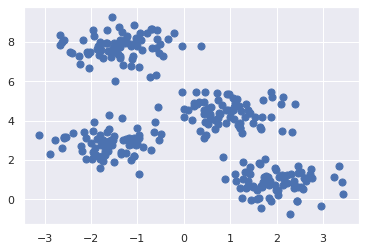

In [ ]:
#とりあえずクラスタ4のサンプルデータ
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
# sklearnのk-meansはfrom sklearn.cluster import KMeans
from sklearn.cluster import KMeans
# n_clastersでクラスタ数を指定
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

'''
KMeansの引数
max_iter=繰り返し回数(デフォルト:300)
n_clasters=クラスタ数
tol=収束判定に使う許容範囲誤差
'''
# https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

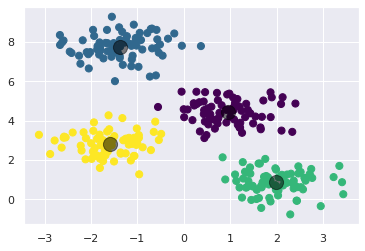

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# kmeans.cluster_centers_：各クラスタの重心の位置

EMアルゴリズム  
→k-meansのベースになるアルゴリズム  

混合ガウスモデルにEMアルゴリズムを適用したのがk-means  
混合ガウスモデル  
→ガウス分布(正規分布)を組み合わせたようなモデル  

EMアルゴリズムって何  
→確率モデルの最尤度推定  
最尤度→もっともらしい確率  

最尤度を直接求めるのではなく，2ステップに分けて求める  
Eステップ→期待値を求める(重心に近いデータにクラスタを割り当てる)  
Mステップ→偏微分をして最尤度を求める(重心を割り当てる)

EMアルゴリズムの理論は難しいので別の資料と時間が必要そう  
(実装のためには必要なさそうだけど)  
https://www.nogawanogawa.com/entry/em_algorithm  
https://tips-memo.com/python-emalgorithm-gmm#EM-4


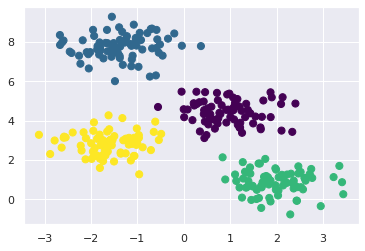

In [ ]:
# k-meansを実装してみる
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # ランダムにクラスタを設定
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 重心を基にクラスタを設定
        labels = pairwise_distances_argmin(X, centers)
        
        # クラスタから新しい重心を設定
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

EMアルゴリズムの注意点

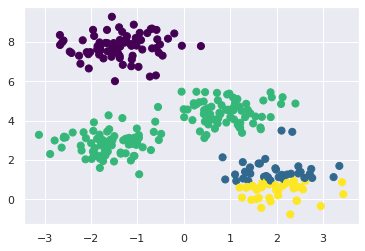

In [ ]:
# 最も良い結果にならないことがある
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

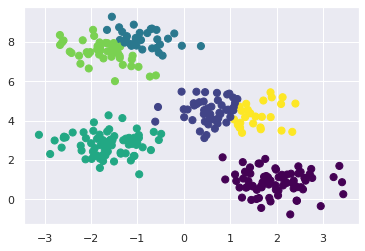

In [ ]:
# クラスタ数は自分で決める
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

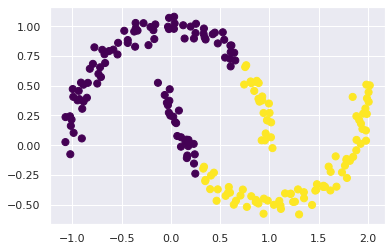

In [ ]:
# 非線形ではうまくいかない
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

例  
1.手書き数字分類

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# 0～9の10クラスタ
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
# cluster_centers_で典型的な例を見れる

(10, 64)

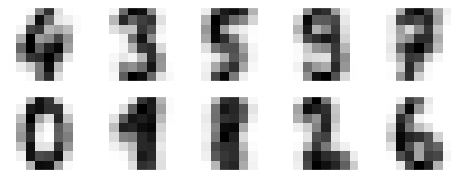

In [13]:
# 典型的な例は何か確認
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# 画像表示のため(10, 8, 8)にreshape
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
# →1と8以外はうまくいってるように見える

In [15]:
# ↑の通り教師なし学習でラベルの順序もわからんからラベルを並び替える
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [16]:
# 正解率確認
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)
# 約8割正解してるから有用

0.7935447968836951

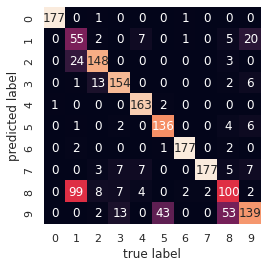

In [18]:
# 混同行列確認
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
# 確かに1と8はあんまりうまくいってない、あと9もうまく予測できていない

例2.色圧縮  
→数百万色の画像から色数を少なくしてみる

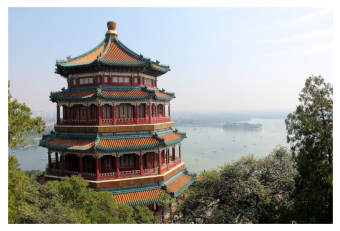

In [19]:
# テスト画像を引っ張ってきて表示
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [20]:
china.shape

(427, 640, 3)

In [21]:
# 使われてる色を可視化するために2次元にする
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [22]:
# 赤と青、赤と緑の割合から使われてる色数を表示
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

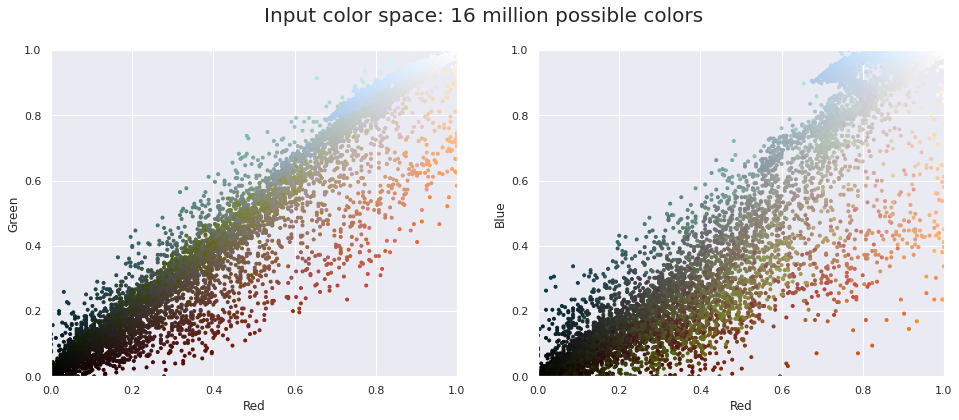

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

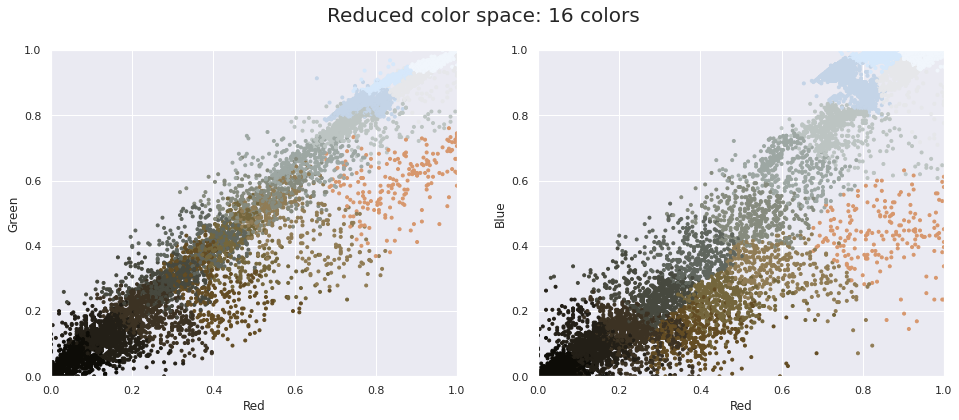

In [26]:
# k-meansで16万色を16色に減らす
# 薄いが色でクラスタに分かれている
from sklearn.cluster import MiniBatchKMeans
# データが多いのでミニバッチ学習(1万個より多い場合にはMiniBatchKMeansを使うことが推奨されている)
# MiniBatchKMeans(<クラスタ数>)
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

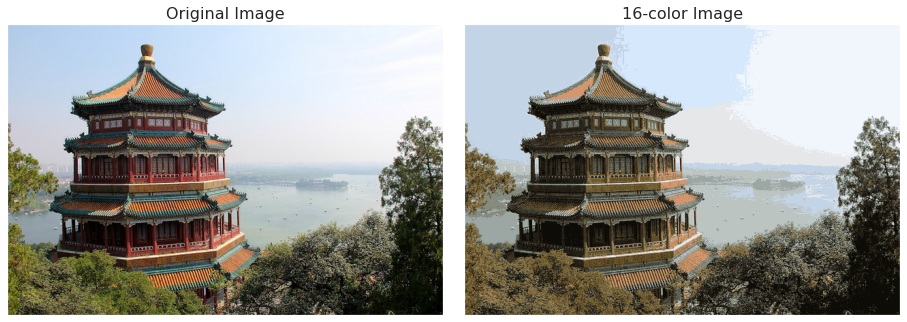

In [27]:
# 表示
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);